In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_colwidth', None)

In [3]:
data = pd.read_csv('../data/scout_data/Case_Study_Data_CLEANED.csv')
description = pd.read_csv("../data/scout_data/Data_Description.csv", sep=';')
data.head()

,product_tier,make_name,car_age,price,search_views,detail_views,stock_days,ctr,article_id,first_zip_digit,created_date,deleted_date
0,Basic,Mitsubishi,11,16750,3091.0,123.0,30,0.03780329990294403,350625839,5,24.07.18,24.08.18
1,Basic,Mercedes-Benz,9,35950,3283.0,223.0,52,0.06792567773378008,354412280,4,16.08.18,07.10.18
2,Basic,Mercedes-Benz,26,11950,3247.0,265.0,51,0.0816137973514013,349572992,3,16.07.18,05.09.18
3,Basic,Ford,21,1750,1856.0,26.0,101,0.014008620689655173,350266763,6,20.07.18,29.10.18
4,Basic,Mercedes-Benz,10,26500,490.0,20.0,12,0.04081632653061224,355688985,3,28.08.18,08.09.18


# Select and order columns


In [7]:
data = data[['product_tier', 'make_name', 'car_age', 'price', \
    'search_views', 'detail_views', 'stock_days', 'ctr']]


data = data.reset_index(drop=True)
data[:2]

,product_tier,make_name,car_age,price,search_views,detail_views,stock_days,ctr
0,Basic,Mitsubishi,11,16750,3091.0,123.0,30,0.03780329990294403
1,Basic,Mercedes-Benz,9,35950,3283.0,223.0,52,0.06792567773378008


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
car_age,78320.0,12.911747,6.529636,4.0,9.00,11.0,16.0,100.0
price,78320.0,15067.737730,16374.581499,100.0,5750.00,10903.5,18890.0,249888.0
search_views,78320.0,2297.530414,6338.665382,0.0,367.75,920.0,2234.0,608754.0
detail_views,78320.0,93.463662,228.013191,0.0,13.00,36.0,94.0,13926.0
stock_days,78320.0,35.988023,32.213302,0.0,10.00,25.0,55.0,127.0


# Conditional Price Analysis

In [22]:
## What is the mean, minimum, maximum and standard deviation price per make_name
data.groupby(["make_name"]).agg(
    {"price": [round(np.mean), np.max, np.min, np.std, "count"]}
).reset_index().sort_values(by=('price', 'mean'), ascending=False)

make_name          price                                    
                          mean     max     min           std count
0            AC  139900.000000  139900  139900           NaN     1
59      McLaren  138250.000000  139500  137000   1767.766953     2
31      Ferrari  131870.903226  249888   44950  61218.099230    31
47  Lamborghini  115948.333333  149500   98845  29058.441258     3
11      Bentley   96991.857143  239800   15950  50793.330676    35
..          ...            ...     ...     ...           ...   ...
70      Piaggio    3250.000000    3250    3250           NaN     1
83         Tata    2750.000000    2750    2750           NaN     1
15     Casalini    2740.000000    2740    2740           NaN     1
75        Rover    2000.478261    4950     595   1109.754964    23
24       Daewoo    1092.703297    1950     225    424.922699    91

[91 rows x 6 columns]

In [9]:
df = data.copy()

# create 10 bins over car_age
df["age_bins"] = pd.cut(df["car_age"], bins=10)
df.head()

,product_tier,make_name,car_age,price,search_views,detail_views,stock_days,ctr,age_bins
0,Basic,Mitsubishi,11,16750,3091.0,123.0,30,0.03780329990294403,"(3.904, 13.6]"
1,Basic,Mercedes-Benz,9,35950,3283.0,223.0,52,0.06792567773378008,"(3.904, 13.6]"
2,Basic,Mercedes-Benz,26,11950,3247.0,265.0,51,0.0816137973514013,"(23.2, 32.8]"
3,Basic,Ford,21,1750,1856.0,26.0,101,0.014008620689655173,"(13.6, 23.2]"
4,Basic,Mercedes-Benz,10,26500,490.0,20.0,12,0.04081632653061224,"(3.904, 13.6]"


In [10]:
# calculate mean, max,min and std over each bin
df.groupby(["age_bins"]).agg(
    {"price": [np.mean, np.max, np.min, np.std, "count"]}
).reset_index()

age_bins         price                                    
                          mean     max    min           std  count
0  (3.904, 13.6]  19806.173383  249888    100  17298.153971  50178
1   (13.6, 23.2]   6117.065250  149500    100   6553.261155  24613
2   (23.2, 32.8]   3793.425940  209950    100  10933.557838   2660
3   (32.8, 42.4]  15906.392086  129950    300  16869.317182    278
4   (42.4, 52.0]  22538.461224  149500   1500  23249.528669    245
5   (52.0, 61.6]  36646.031250  215000   1150  31028.548184    224
6   (61.6, 71.2]  67223.913043  220000   3900  55994.133562     92
7   (71.2, 80.8]  29336.000000  139950   6750  32113.669942     15
8   (80.8, 90.4]  51783.333333  149950  13000  43823.081818      9
9  (90.4, 100.0]  62985.000000  235000  17510  84608.266440      6

Text(0.5, 1.0, 'search views')

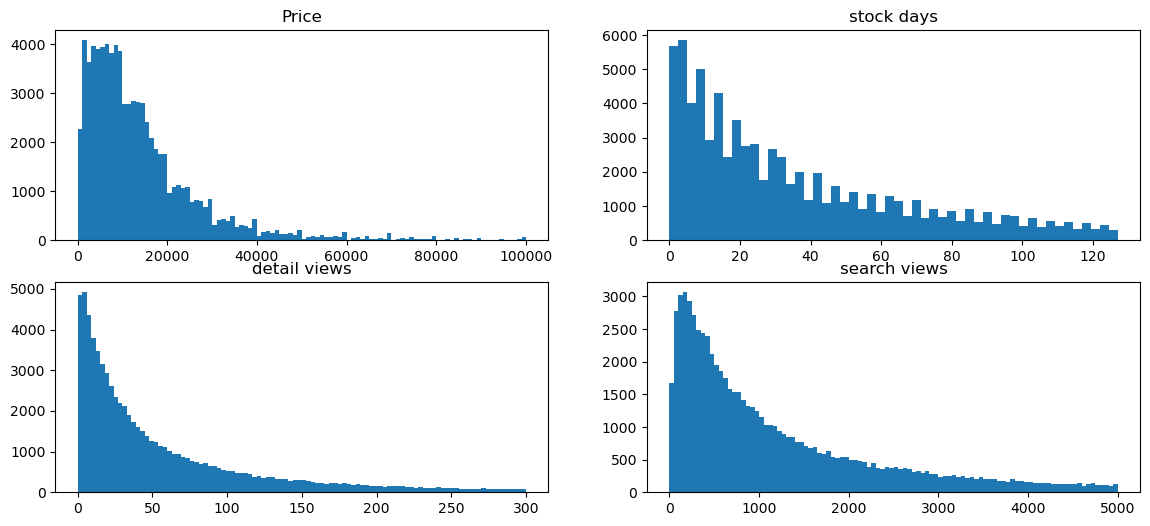

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(14, 6))

ax[0, 0].hist(df.price, bins=100, range=(0,100000));
ax[0, 0].set_title("Price")

ax[0, 1].hist(df.stock_days, bins=50);
ax[0, 1].set_title("stock days")

ax[1, 0].hist(df.detail_views, bins=100, range=(0, 300));
ax[1, 0].set_title("detail views")

ax[1, 1].hist(df.search_views, bins=100, range=(0, 5000));
ax[1, 1].set_title("search views")

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78320 entries, 0 to 78319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   product_tier  78320 non-null  object  
 1   make_name     78320 non-null  object  
 2   car_age       78320 non-null  int64   
 3   price         78320 non-null  int64   
 4   search_views  78320 non-null  float64 
 5   detail_views  78320 non-null  float64 
 6   stock_days    78320 non-null  int64   
 7   ctr           78320 non-null  object  
 8   age_bins      78320 non-null  category
dtypes: category(1), float64(2), int64(3), object(3)
memory usage: 4.9+ MB


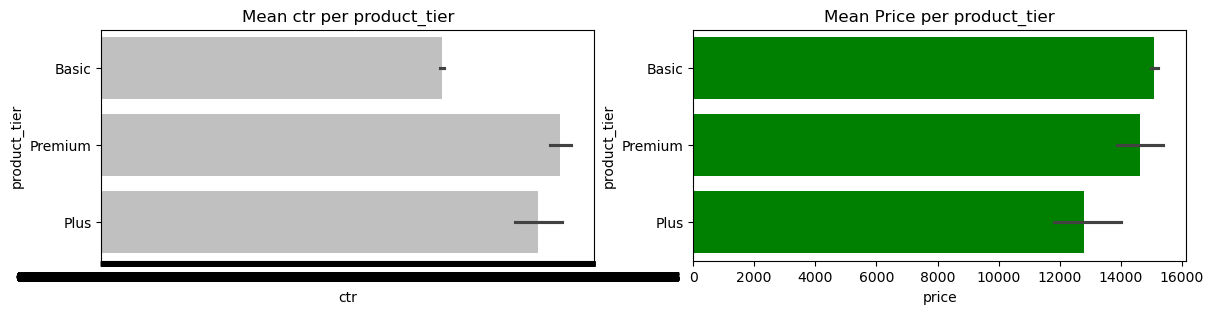

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(14, 3))
sns.barplot(data=data, x="ctr", y="product_tier", orient="h", facecolor='silver', ax=ax[0]);
ax[0].set_title("Mean ctr per product_tier");

sns.barplot(data=data,x = 'price', y = 'product_tier',orient='h', facecolor='green', ax=ax[1]);
ax[1].set_title('Mean Price per product_tier');
plt.show()

# Correlations

ValueError: could not convert string to float: 'Basic'

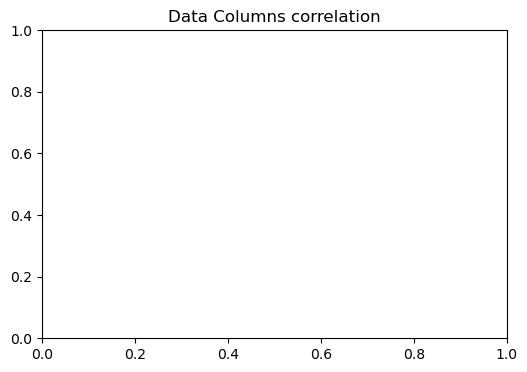

In [29]:
# plot data-column correlations
plt.figure(figsize=(6,4))
plt.title('Data Columns correlation')
sns.heatmap(df.corr())
plt.show()